In [1]:
from mnist_example import *

In [2]:
xd,yd,xt,yt = load_data()
BATCH = 128
EPOCH = 10

teacher = Model(build_teacher_model, "teacher", fn_compile)
student = Model(build_student_model, "student", fn_compile)

callbacks = [keras.callbacks.TensorBoard('logs')]
h1 = teacher.train(xd, yd, BATCH, EPOCH, callbacks, (xt,yt))
h2 = student.train(xd, yd, BATCH, EPOCH, callbacks, (xt,yt))

teacher.save()
student.save()

student2 = Model(build_student_model, "student2", fn_compile)
distill = Distill(teacher, student2, 10, 2.0, 0.07)
h3 = distill.teach(xd, yd, BATCH, EPOCH, callbacks, (xt,yt))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.3288 - acc: 0.9075 - val_loss: 0.1709 - val_acc: 0.9491
Epoch 2/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.1369 - acc: 0.9595 - val_loss: 0.1184 - val_acc: 0.9622
Epoch 3/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0969 - acc: 0.9705 - val_loss: 0.1064 - val_acc: 0.9681
Epoch 4/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0751 - acc: 0.9774 - val_loss: 0.0877 - val_acc: 0.9735
Epoch 5/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0599 - acc: 0.9822 - val_loss: 0.0896 - val_acc: 0.9716
Epoch 6/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0480 - acc: 0.9858 - val_loss: 0.0911 - val_acc: 0.9731
Epoch 7/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0411 - acc: 0.9874 - val_loss: 0.0830 - val_acc

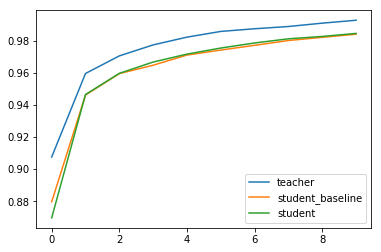

In [3]:
plt.plot(h1.history['acc'], label='teacher')
plt.plot(h2.history['acc'], label='student_baseline')
plt.plot(h3.history['accuracy'], label='student')
plt.legend()